学生录取问题：根据两次考试的成绩决定申请者是否被录取，你可用以前申请者的历史数据作为训练集，对于每个训练样本，你有申请人两次考试的分数和录取决定，我们将构建一个分类模型（逻辑回归），该模型根据考试分数来估计录取的概率。

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1 准备实验数据

In [2]:
#os.getcwd()
path="D:\PycharmProjects\Object_Detection_Funcs\Regression\Logistic Regression\data\ex2data1.txt"
data=pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Admitted为二值标签，1表示被录取，0表示未被录取。

# 2 可视化训练数据

Text(0,0.5,'Exam 2 Score')

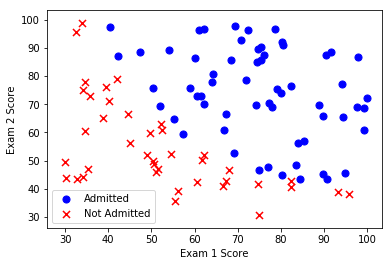

In [8]:
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]

fig,ax=plt.subplots()
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# 3 Sigmoid

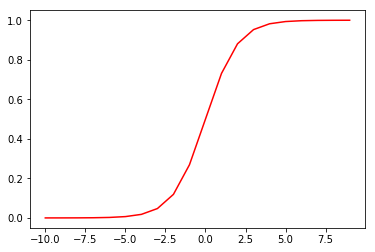

In [12]:
def sigmoid(z):
    return  1/(1+(np.exp(-z)))

nums=np.arange(-10,10,step=1)
#print(nums)
fig,ax=plt.subplots()
ax.plot(nums,sigmoid(nums),c='r')

# 4 损失函数 

In [42]:
def cost(weights,X,y):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*weights.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*weights.T)))
    return np.sum(first-second)/(len(X)) 

#data.insert(0,'Ones',1)
#data.shape[1]
# set X (training data) and y (target variable)
X=data.iloc[:,:3]
y=data.iloc[:,3:]
#print(X,'\n',y)
#convert to numpy arrays and initalize the parameter array theta
X=np.array(X.values)
y=np.array(y.values)
weights=np.zeros(3)
#print(X,'\n',y,'\n',weights)
print(X.shape)
print(weights.shape)
print(y.shape)
#Now let's compute the cost for our initial solution (0 values for weights).
cost(weights,X,y)

(100, 3)
(3,)
(100, 1)


0.6931471805599453

# 5 梯度下降法更新参数

In [44]:
def gradient(weights,X,y):
    weights=np.matrix(weights)
    X=np.matrix(X)
    y=np.matrix(y)
    
    parameters=weights.ravel().shape[1]
    grad=np.zeros(parameters)
    
    error=sigmoid(X*weights.T)-y
    
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    
    return  grad

gradient(weights,X,y)

import scipy.optimize as opt
result=opt.fmin_tnc(func=cost,x0=weights)

array([ -0.1       , -12.00921659, -11.26284221])